In [1]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

import umap
import scipy.io as sio
import hdbscan

In [2]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [3]:
# data_path = '/media/user/teamshare/nick/behavior/grooming/1p/GER2_ai94/20231116173257/GER2_ai94_20231116173257_svd.mat'
data_path = '/media/user/teamshare/nick/behavior/grooming/1p/GER2_ai94/20231116173257//GER2_ai94_20231116173257_svd.mat'
mat_contents =  sio.loadmat(data_path)

In [4]:
dat = np.dot(mat_contents['U'], np.dot(mat_contents['s'], mat_contents['V']))

In [5]:
dat.shape

(22898, 109628)

In [6]:
groom_file = '/media/user/teamshare/nick/behavior/grooming/1p/GER2_ai94/20231116173257/grooming_events_roi_filtered.mat'
mat_contents = sio.loadmat(groom_file)

In [7]:
groom_idx = mat_contents['all_events']
for i, idx in enumerate(groom_idx):
    if i == 0:
        groom_frames = dat[:,idx[0]:idx[1]]
    else:
        groom_frames = np.hstack((groom_frames, dat[:, idx[0]:idx[1]]))

print(groom_frames.shape)

(22898, 9578)


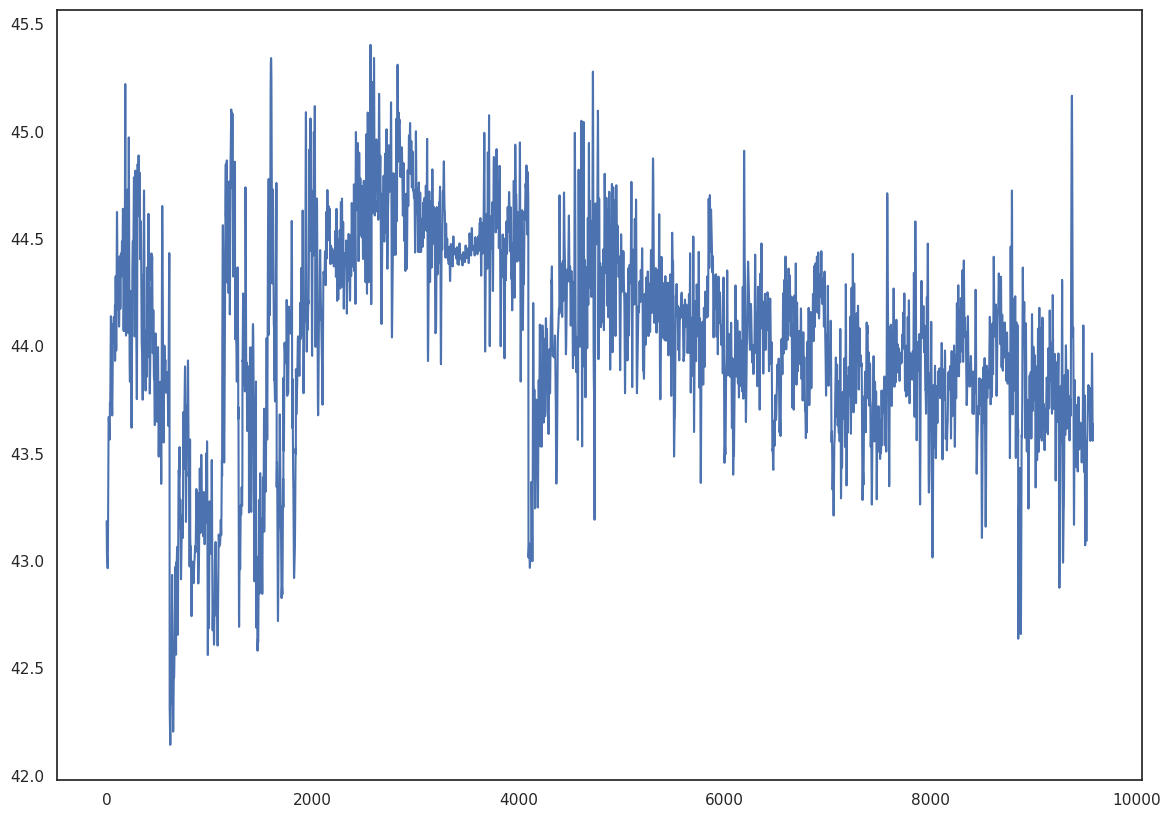

In [22]:
plt.figure()
plt.plot(np.mean(groom_frames, axis=0))
plt.show()

In [154]:
dlc_file = '/media/user/teamshare/nick/behavior/grooming/1p/HYL3_tTA/20231116184954/HYL3_tTA_20231116184954_trimDLC_resnet50_mouse_groomingNov27shuffle1_1030000.csv'
df_dlc = pd.read_csv(dlc_file, header=0, skiprows=1)            
fllx = df_dlc['fll'][1:].to_numpy().astype(np.float32)
flly = df_dlc['fll.1'][1:].to_numpy().astype(np.float32)
fllp = df_dlc['fll.2'][1:].to_numpy().astype(np.float32)
idx = fllp<0.9

# fllx[idx] = np.nan
# flly[idx] = np.nan

flrx = df_dlc['flr'][1:].to_numpy().astype(np.float32)
flry = df_dlc['flr.1'][1:].to_numpy().astype(np.float32)
flrp = df_dlc['flr.2'][1:].to_numpy().astype(np.float32)
idx = flrp<0.9

# flrx[idx] = np.nan
# flry[idx] = np.nan

/tmp/ipykernel_9273/3415388642.py:2: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_dlc = pd.read_csv(dlc_file, header=0, skiprows=1)


In [155]:
reducer = umap.UMAP(min_dist=0.0, n_neighbors=40, metric='euclidean', n_components=2, verbose=True)


In [3]:
dat = np.vstack((flrx, flry, flrp, fllx, flly, fllp))
dat.shape

(6, 109748)

In [156]:
# reducer.fit(groom_frames.T)
reducer.fit(dat.T)

UMAP(min_dist=0.0, n_neighbors=40, verbose=True)
Fri Dec 15 08:39:49 2023 Construct fuzzy simplicial set
Fri Dec 15 08:39:53 2023 Finding Nearest Neighbors
Fri Dec 15 08:39:53 2023 Building RP forest with 22 trees
Fri Dec 15 08:40:57 2023 NN descent for 17 iterations
	 1  /  17
	 2  /  17
	 3  /  17
	Stopping threshold met -- exiting after 3 iterations
Fri Dec 15 08:44:43 2023 Finished Nearest Neighbor Search
Fri Dec 15 08:44:51 2023 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Fri Dec 15 08:45:51 2023 Finished embedding


UMAP(min_dist=0.0, n_neighbors=40, verbose=True)

In [12]:
UMAP(a=None, angular_rp_forest=False, b=None,
     force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
     local_connectivity=1.0, low_memory=False, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, output_metric='euclidean',
     output_metric_kwds=None, random_state=42, repulsion_strength=1.0,
     set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
     target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
     transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False)

NameError: name 'UMAP' is not defined

In [139]:
# embedding = reducer.transform(dat.T)
embedding = reducer.transform(groom_frames.T)
# Verify that the result of calling transform is
# idenitical to accessing the embedding_ attribute
assert(np.all(embedding == reducer.embedding_))
embedding.shape

(9578, 3)

/tmp/ipykernel_9273/1914486023.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding[:, 0], embedding[:, 1], cmap='Spectral', s=5)


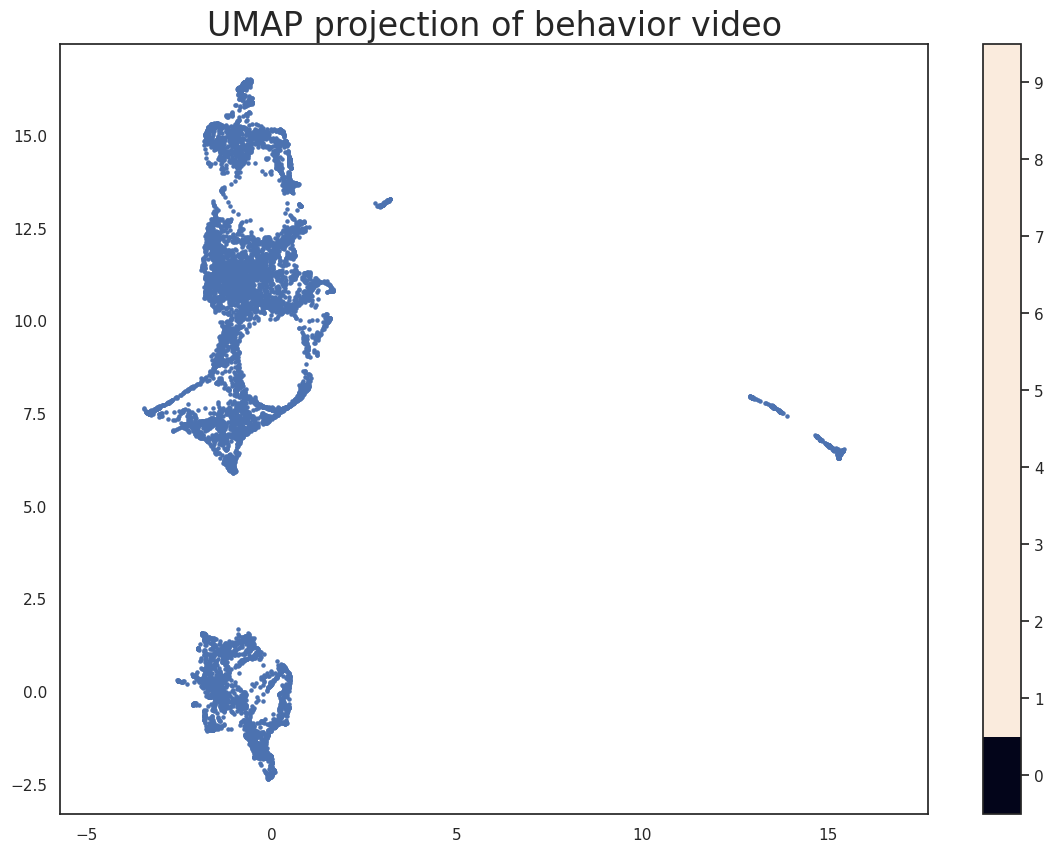

In [140]:
plt.scatter(embedding[:, 0], embedding[:, 1], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of behavior video', fontsize=24);

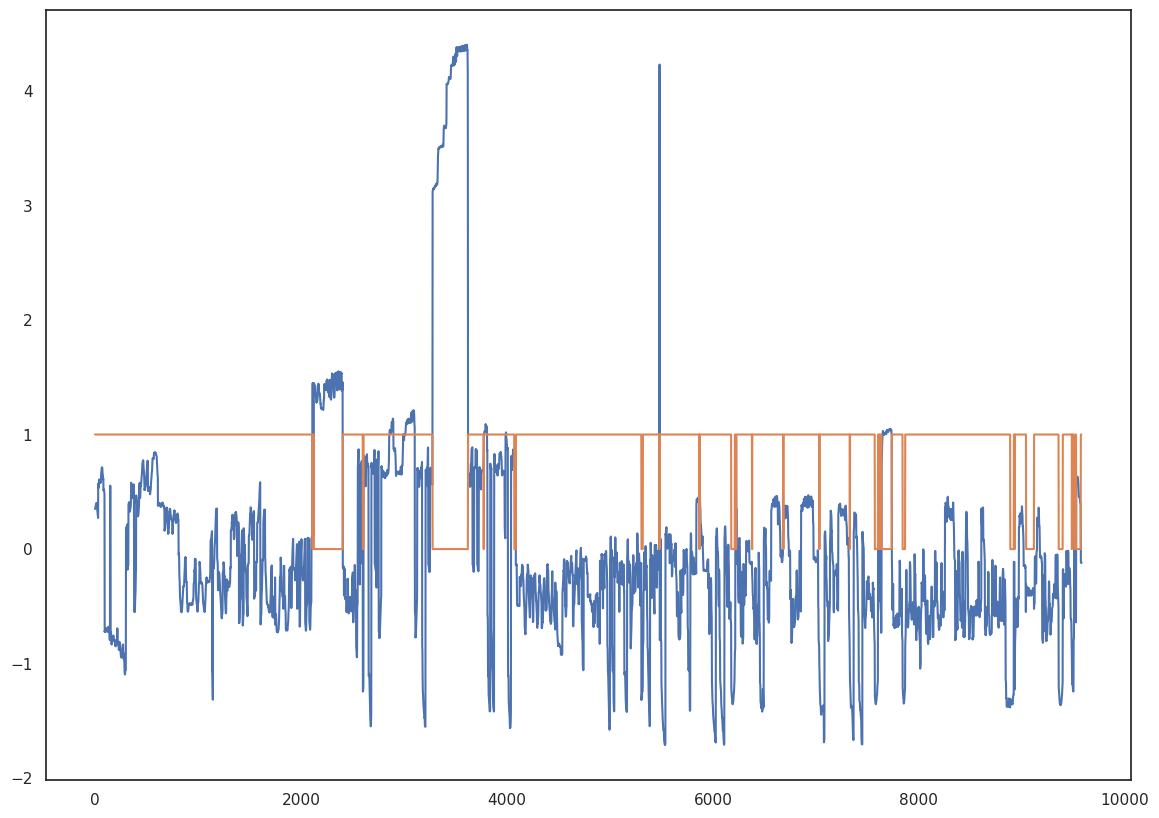

In [43]:
# import scipy.stats as stats
plt.figure(), plt.plot(stats.zscore(embedding[:,0])), 
# plt.plot(stats.zscore(mat_contents['FL_L'][0])- 15)
# plt.plot(stats.zscore(mat_contents['FL_R'][0]) - 9)
plt.plot(labels>=0)
plt.show()


{0, 1, 2, 3, 4, 5, -1}


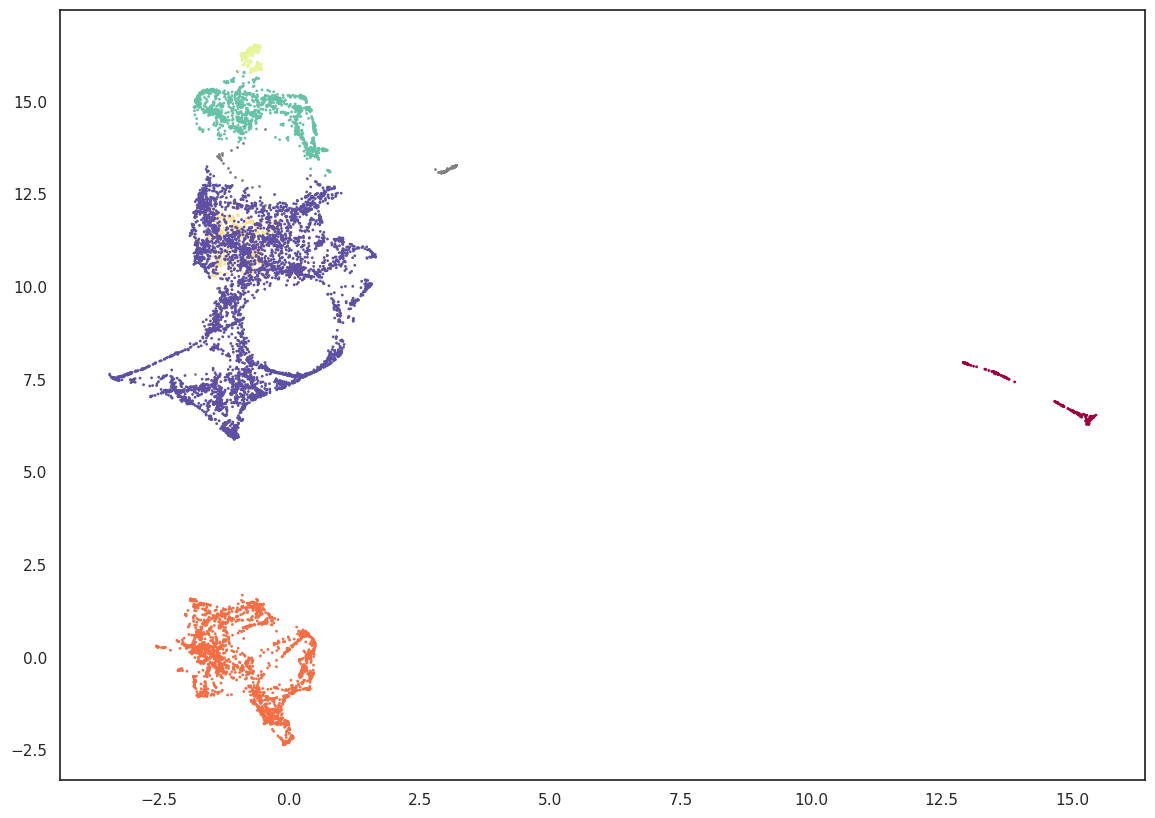

In [143]:
labels = hdbscan.HDBSCAN(
    min_samples=10,
    min_cluster_size=200,
).fit_predict(embedding)


clustered = (labels >= 0)
plt.scatter(embedding[~clustered, 0],
            embedding[~clustered, 1],
            color=(0.5, 0.5, 0.5),
            s=1,
            alpha=1)
plt.scatter(embedding[clustered, 0],
            embedding[clustered, 1],
            c=labels[clustered],
            s=1,
            cmap='Spectral');
print(set(labels))

yes


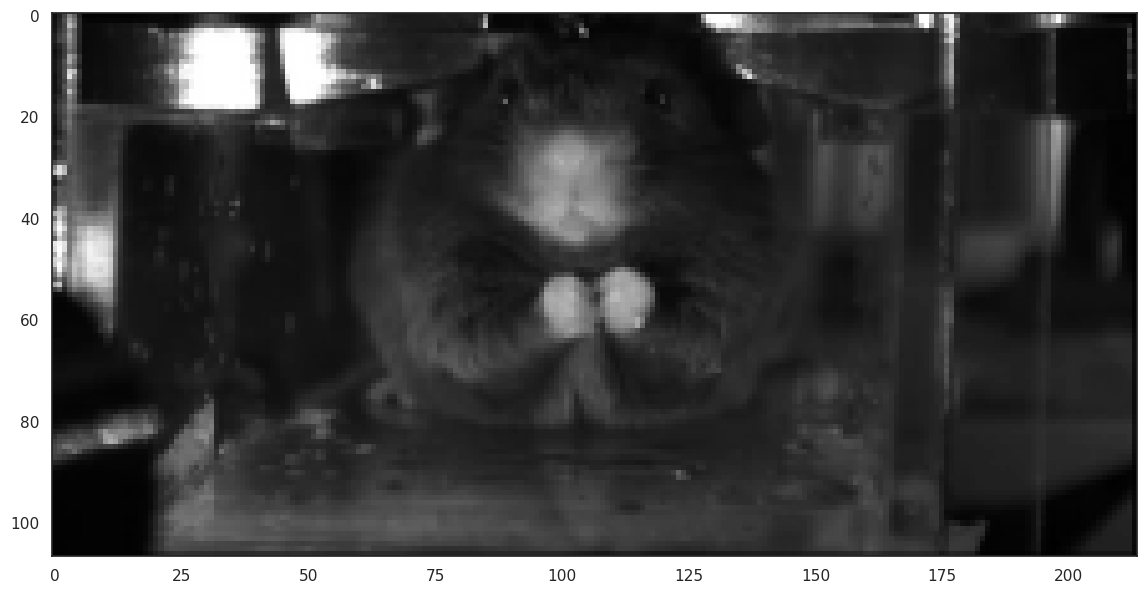

yes


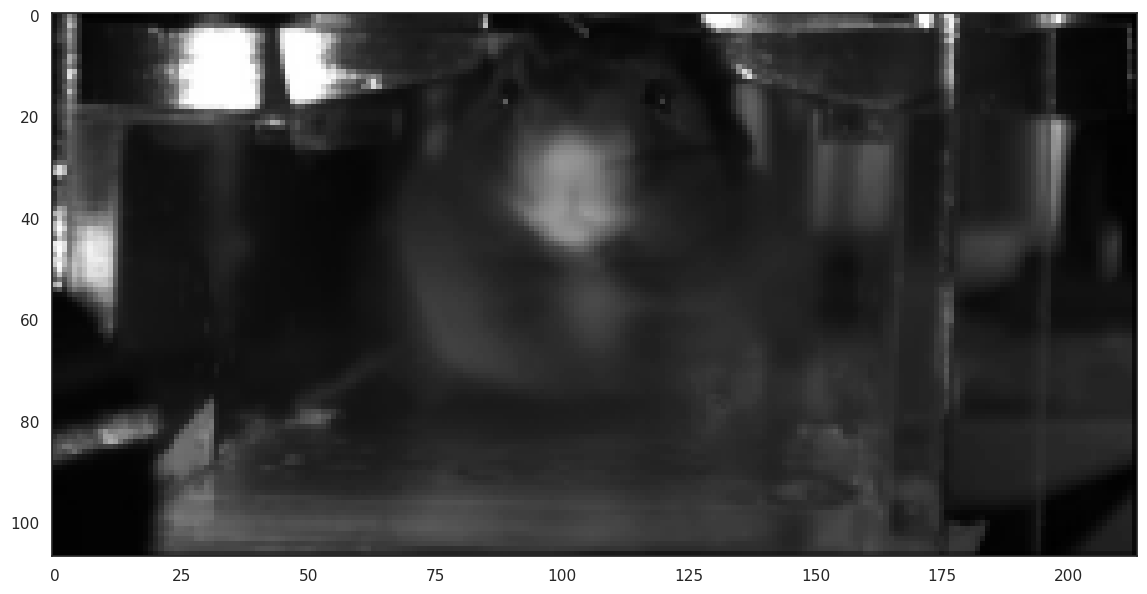

yes


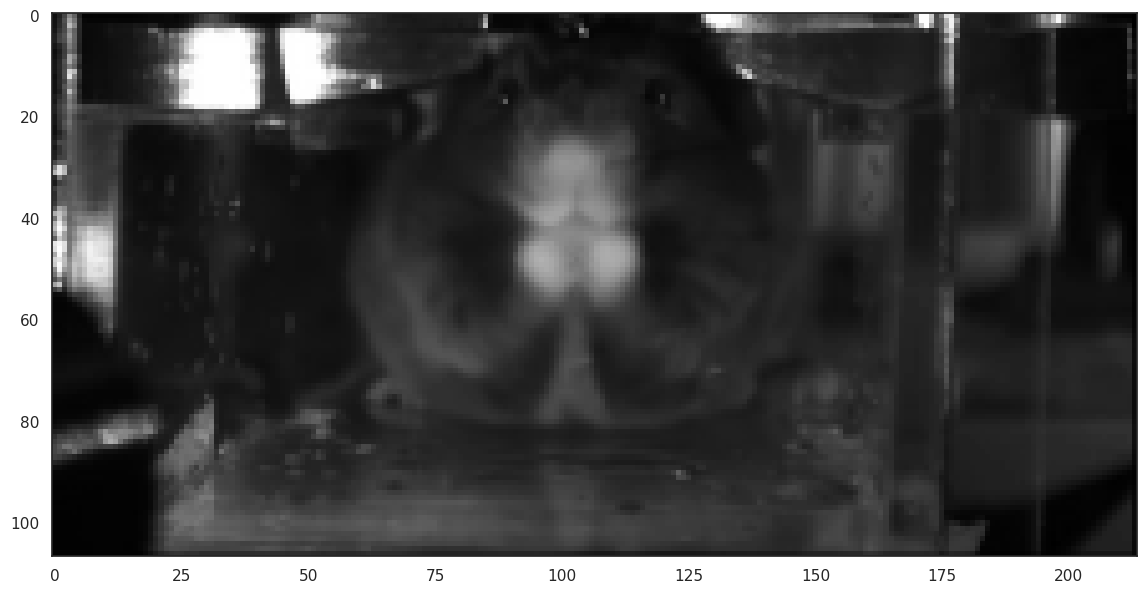

yes


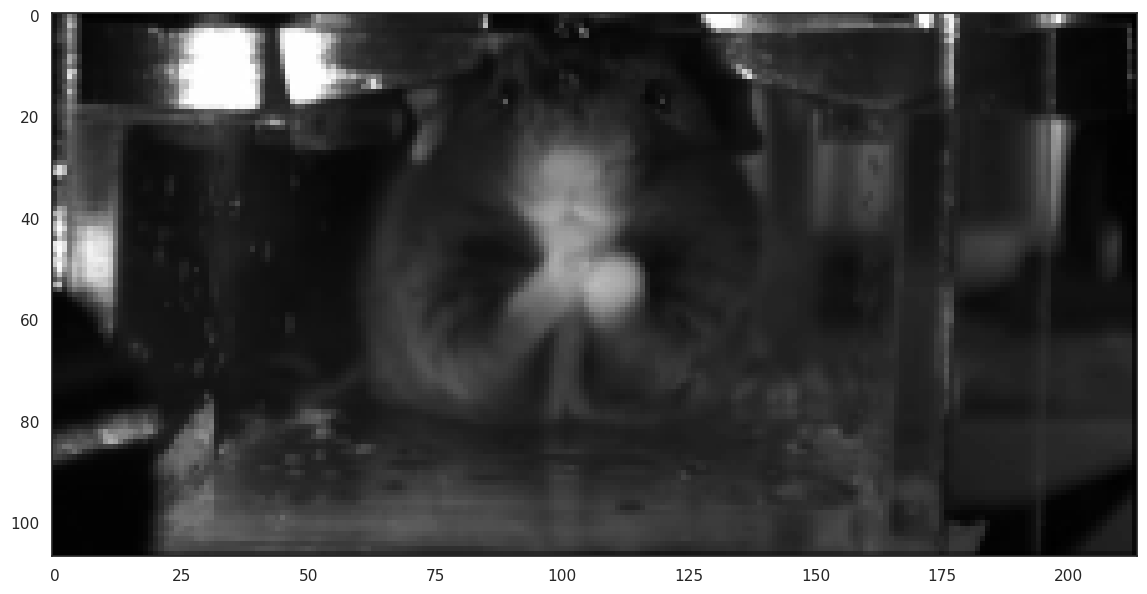

yes


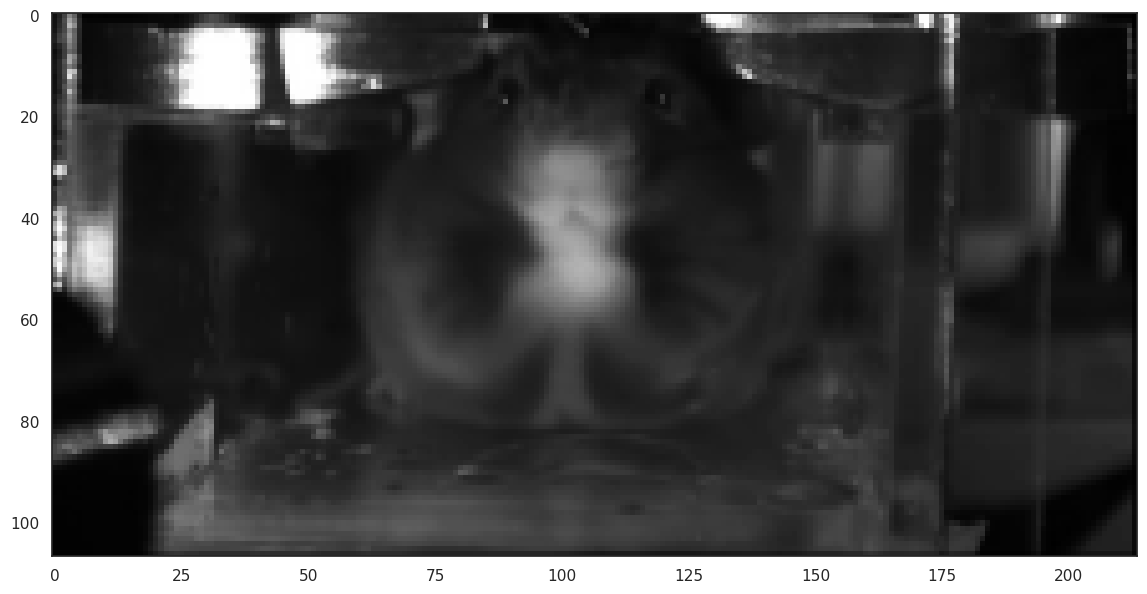

yes


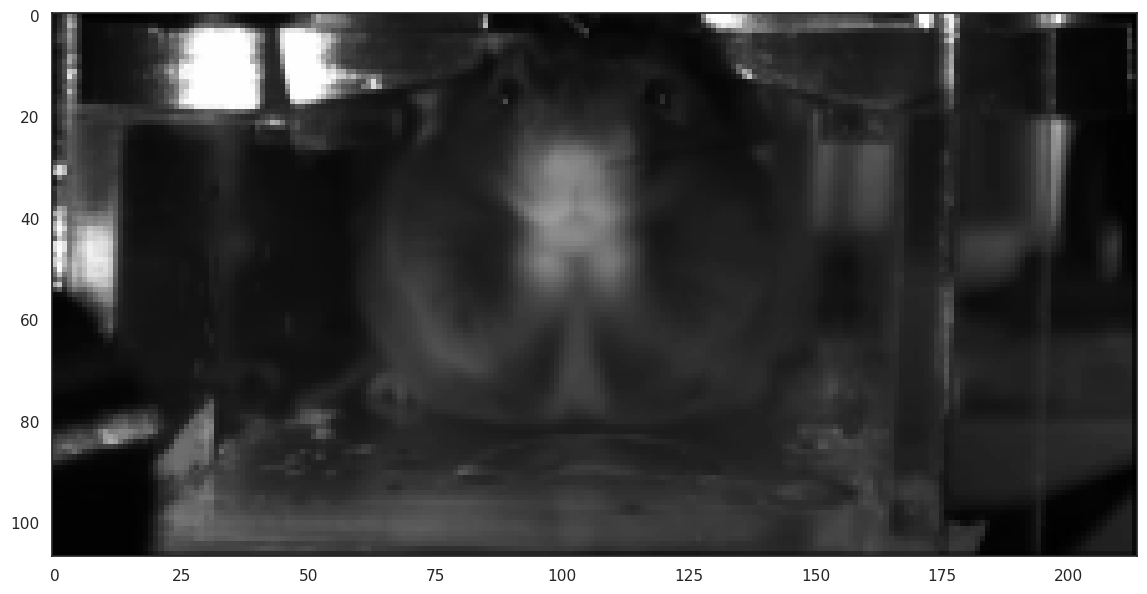

no


In [153]:
output_path = '/media/user/teamshare/nick/behavior/grooming/1p/GER2_ai94/20231116173257/'
from helper import *
# plt.figure, plt.plot(labels==1), plt.show()

for i in set(labels):
    if i == -1:
        print("no")
    else:
        print("yes")
        frames_in_clus = groom_frames[:,labels==i]
        frames_in_clus = np.clip(frames_in_clus, 0, 255).astype(np.uint8)
        frames_in_clus = np.reshape(frames_in_clus, (107, 214, frames_in_clus.shape[1]))
        # open_cv_write_video_from_arr(output_path + "UMAP_cluster{}.mp4".format(i), np.rollaxis(frames_in_clus, 2), fps=30)
        plt.figure(), plt.imshow(np.median(frames_in_clus, axis=2)), plt.set_cmap('gray'), plt.show()
        
        

In [147]:
print(frames_in_clus.shape)
# test = np.rollaxis(frames_in_clus, 2)
# print(test.shape)

(107, 214, 4609)


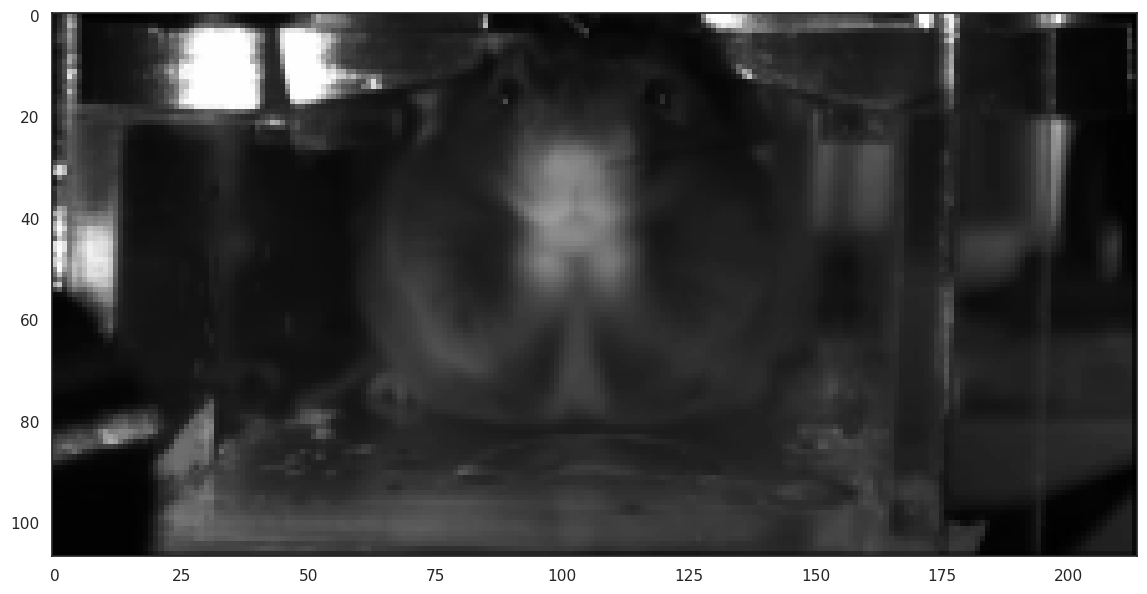

(<Figure size 1400x1000 with 1 Axes>,
 None,
 None)

In [151]:
plt.figure(), plt.imshow(np.median(frames_in_clus, axis=2)), plt.set_cmap('gray'), plt.show()

In [73]:
frames_in_clus.min()

-33.317379352600064